In [1]:
import cv2
import matplotlib.pyplot as plt
import ultralytics

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO('weights/best.pt')

In [3]:
def detect_yolo(image_path):
    image_path = image_path 
    image = cv2.imread(image_path)
    
    # Perform object detection
    results = model(image)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get the predictions
    boxes = results[0].boxes  # Get the detected boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Get the coordinates of the box
        label = box.cls.item()  # Get the class label
        confidence = box.conf.item()  # Get the confidence score as a Python float
        # Draw the box and label on the image
        cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(image_rgb, f'{model.names[int(label)]} {confidence:.2f}', (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


0: 640x640 7 EUR-5-cents, 182.3ms
Speed: 6.4ms preprocess, 182.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


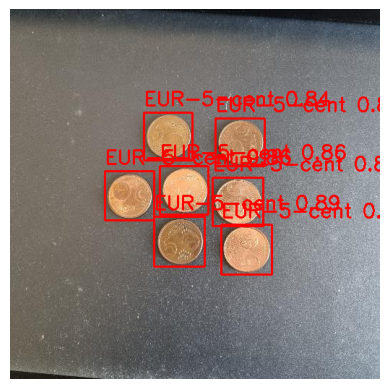

In [4]:
detect_yolo("data/detect_test/20210324_153749_jpg.rf.493837c7a9355f928ce74ef70cf525da.jpg")


0: 640x640 1 EUR-10-cent, 147.5ms
Speed: 3.5ms preprocess, 147.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


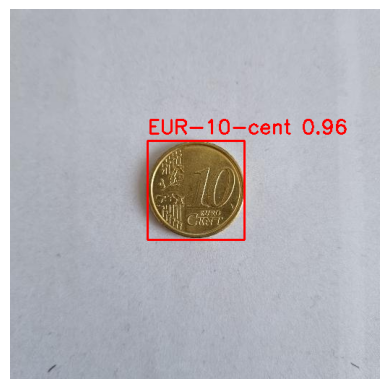

In [5]:
detect_yolo("data/detect_test/20210324_155021_jpg.rf.b0bcde69ad4294e38c7fe66c97d34c1b.jpg")


0: 640x640 5 EUR-1-euros, 160.3ms
Speed: 5.4ms preprocess, 160.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


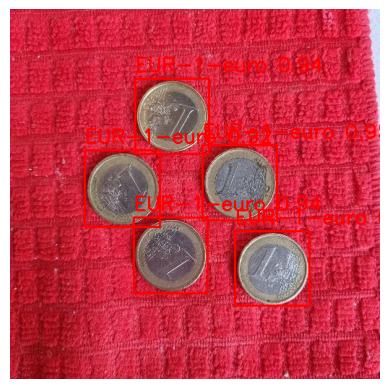

In [6]:
detect_yolo("data/detect_test/20210327_181220_jpg.rf.22b8c8af055b2578000120f1e9e17d3d.jpg")

In [7]:
result_vid = model.track(source = 'data/IMG_7776.mp4', show = True, save= True, tracker = 'bytetrack.yaml')